In [115]:
# keypoint map
body_parts = {
    0: "Nose",
    1: "L_Eye",
    2: "R_Eye",
    3: "L_Ear",
    4: "R_Ear",
    5: "L_Shldr",
    6: "R_Shldr",
    7: "L_Elbow",
    8: "R_Elbow",
    9: "L_Wrist",
    10: "R_Wrist",
    11: "L_Hip",
    12: "R_Hip",
    13: "L_Knee",
    14: "R_Knee",
    15: "L_Ankle",
    16: "R_Ankle"
}

In [139]:
import numpy as np
import cv2

# Angle Calculator
def calculate_angle(p1, p2, p3):
    # p1, p2, p3 are the points in format [x, y]
    # Calculate the vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    
    # Calculate the angle in radians
    angle_rad = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    
    # Convert to degrees
    angle_deg = np.degrees(angle_rad)
    
    return int(angle_deg)

def kpxy(image,point):
    '''get keypoint in x,y with respect to image'''
    x, y = point[0], point[1]
    h, w = image.shape[:2]
    px, py = int(x * w), int(y * h)
    return [px, py]


def visual_keypoints(image,keypoints):
    for keypoint in keypoints:
        # Iterate over key points and add numbering
        for i, (x, y) in enumerate(keypoint):
            # Convert normalized coordinates (x, y) to pixel values based on image dimensions
            h, w = image.shape[:2]
            px, py = int(x * w), int(y * h)
            # Draw keypoint
            cv2.circle(image, (px, py), radius=3, color=(0, 0, 255), thickness=-1)
            
            # Add text label with number
            cv2.putText(image, str(i + 1), (px, py - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1, cv2.LINE_AA)
    return image




import cv2

def add_text_top_left(image, text, position, font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=1, color=(255, 0, 255), thickness=2):
    """
    Adds text to the top-left corner of an image.

    :param image: The input image as a NumPy array.
    :param text: The text to put on the image.
    :param font: The font type (default: cv2.FONT_HERSHEY_SIMPLEX).
    :param font_scale: The font scale (default: 1).
    :param color: The color of the text in BGR format (default: white).
    :param thickness: The thickness of the text (default: 2).
    :return: The image with the text overlay.
    """
    # Define the text position
    #position = (10, 30)  # Slight offset from the top-left corner

    # Add text to the image
    cv2.putText(image, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
    
    return image





def check_posture(image, keypoint, box, postures_to_check=None):
    """
    postures_to_check = ["back", "shoulder", "leg"]
    """
    if postures_to_check is None:
        print("Add body posture to check")
    
    def evaluate_posture_condition(p1, p2, p3, angle_name):
        angle = calculate_angle(p1, p2, p3)
        if angle not in range(90, 120):
            response_text = f"{angle_name}_{angle}"
            image = add_text_top_left(image, text=response_text, position=box_tl, color=(0, 0, 255))
        return image

    box_tl = (int(box[0]), int(box[1])+20)

    if "back" in postures_to_check:
        # Back posture condition
        image = evaluate_posture_condition(
            kpxy(image, keypoint[6]),
            kpxy(image, keypoint[12]),
            kpxy(image, keypoint[14]),
            "BA"
        )

    if "shoulder" in postures_to_check:
        # Shoulder posture condition
        image = evaluate_posture_condition(
            kpxy(image, keypoint[6]),
            kpxy(image, keypoint[8]),
            kpxy(image, keypoint[10]),
            "AA"
        )


    if "leg" in postures_to_check:
        # Leg posture condition
        image = evaluate_posture_condition(
            kpxy(image, keypoint[12]),
            kpxy(image, keypoint[14]),
            kpxy(image, keypoint[16]),
            "leg"
        )

    return image





image 1/1 d:\PycharmProjects\ml_system_design_engineer\demo_task\pose_estimation_demo\pose-estimation-using-yolov8\person_stands.png: 224x640 9 persons, 30.6ms
Speed: 2.0ms preprocess, 30.6ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)


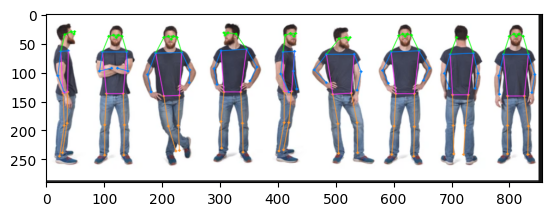

In [117]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a model
model = YOLO("yolo11n-pose.pt")  # load an official model

# Predict with the model
results = model("person_stands.png")  # predict on an image

frame = results[0].plot(boxes=False, kpt_radius=2)
# result.show(boxes=False)  # display to screen
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# result.save(filename="result.jpg",boxes=False)  # save to disk


image 1/1 d:\PycharmProjects\ml_system_design_engineer\demo_task\pose_estimation_demo\pose-estimation-using-yolov8\stand1.jpg: 544x640 2 persons, 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)


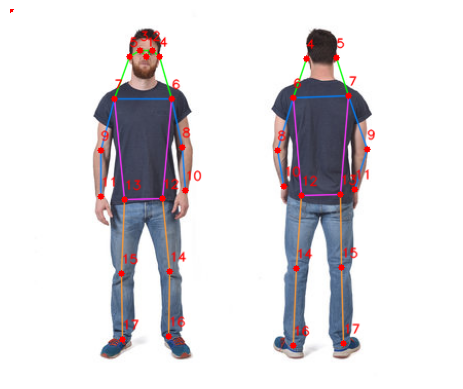

In [118]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a model
model = YOLO("yolo11n-pose.pt")  # Load an official model

# Predict with the model
results = model("stand1.jpg")[0]  # Predict on an image

keypoints = results.keypoints.xyn.tolist()  # Keypoints object for pose outputs
# image = result.orig_img
kp_image = results.plot(boxes=False, kpt_radius=2)
image = visual_keypoints(kp_image,keypoints)


# Display the image with key points numbered
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Optionally save the result image with numbered key points
# cv2.imwrite("result_numbered_keypoints.jpg", image)


Note: Not sure why keypoint number is not showing on mlitple pose detection

# Image Case


image 1/1 d:\PycharmProjects\ml_system_design_engineer\demo_task\pose_estimation_demo\pose-estimation-using-yolov8\images\erg2.jpg: 384x640 3 persons, 36.0ms
Speed: 2.0ms preprocess, 36.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


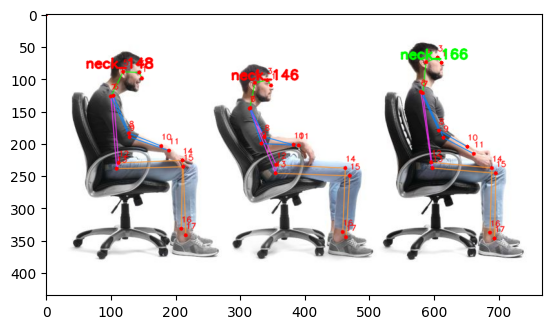

In [161]:
import os, pathlib
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a model
model = YOLO("yolo11n-pose.pt")  # Load an official model
img_path = "images\erg2.jpg"
# Predict with the model
results = model(img_path)[0]  # Predict on an image
boxes = results.boxes.xyxy.tolist()

# Keypoints object for pose outputs
keypoints = results.keypoints.xyn.tolist()
kp_image = results.plot(boxes=False, kpt_radius=2)
image = results.orig_img
image = visual_keypoints(kp_image,keypoints)

# Process results list
i=0
for keypoint, box in zip(keypoints,boxes):
    i+=1
    
# image = check_posture(image, keypoint, box, postures_to_check=['back'])

for keypoint, box in zip(keypoints,boxes):
# neck posture condition
    p1 = kpxy(image,keypoint[4])
    p2 = kpxy(image,keypoint[6])
    p3 = kpxy(image,keypoint[12])
    neck_angle = calculate_angle(p1, p2, p3)
    box_tl = (int(box[0]),int(box[1])+25)
    if neck_angle in range(160,180):
        back_response = f"neck_{neck_angle}"
        image = add_text_top_left(image, text=back_response, position=box_tl, color=(0,255,0), font_scale=0.7)
    else:
        back_response = f"neck_{neck_angle}"
        image = add_text_top_left(image, text=back_response, position=box_tl, color=(0,0,255), font_scale=0.7)


# # leg posture condition
#     p1 = kpxy(image,keypoint[12])
#     p2 = kpxy(image,keypoint[14])
#     p3 = kpxy(image,keypoint[16])
#     leg_angle = calculate_angle(p1, p2, p3)
#     box_tl = (int(box[0]),int(box[1]))
#     if leg_angle in range(90,120):
#         pass
#     else:
#         back_response = f"leg_{leg_angle}"
#         image = add_text_top_left(image, text=back_response, position=box_tl, color=(0,0,255))



# image = visual_angle()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
output_path = pathlib.PureWindowsPath(img_path).stem +'_result.jpg'
# results.save(filename=output_path, boxes=False)

In [ ]:
import os, pathlib
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a model
model = YOLO("yolo11n-pose.pt")  # Load an official model
img_path = "images\erg2.jpg"
# Predict with the model
results = model(img_path)[0]  # Predict on an image
boxes = results.boxes.xyxy.tolist()

# Keypoints object for pose outputs
keypoints = results.keypoints.xyn.tolist()
kp_image = results.plot(boxes=False, kpt_radius=2)
image = results.orig_img
image = visual_keypoints(kp_image,keypoints)

# Process results list
for keypoint, box in zip(keypoints,boxes):
    body_report={}
    # back posture condition
    p1 = kpxy(image,keypoint[6])
    p2 = kpxy(image,keypoint[12])
    p3 = kpxy(image,keypoint[14])
    back_angle = calculate_angle(p1, p2, p3)
    if back_angle in range(90,120):
        pass
    else:
        body_report['back'] = back_angle
 
# Arm posture condition
    p1 = kpxy(image,keypoint[6])
    p2 = kpxy(image,keypoint[8])
    p3 = kpxy(image,keypoint[10])
    arm_angle = calculate_angle(p1, p2, p3)
    # box_tl = (int(box[0]),int(box[1]))
    if arm_angle in range(90,120):
        pass
    else:
        body_report['arm'] = arm_angle


# neck posture condition
    p1 = kpxy(image,keypoint[4])
    p2 = kpxy(image,keypoint[7])
    p3 = kpxy(image,keypoint[12])
    neck_angle = calculate_angle(p1, p2, p3)
    # box_tl = (int(box[0]),int(box[1]))
    if neck_angle in range(90,120):
        pass
    else:
        body_report['neck'] = neck_angle


# leg posture condition
    p1 = kpxy(image,keypoint[12])
    p2 = kpxy(image,keypoint[14])
    p3 = kpxy(image,keypoint[16])
    leg_angle = calculate_angle(p1, p2, p3)
    # box_tl = (int(box[0]),int(box[1]))
    if leg_angle in range(90,120):
        pass
    else:
        body_report['leg'] = leg_angle


# image = add_text_top_left(image, text=response, position=(10,10), color=(0,0,255))
print(body_report)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
output_path = pathlib.PureWindowsPath(img_path).stem +'_result.jpg'
# results.save(filename=output_path, boxes=False)

# Video Case

run `main.py` for video output